C:\Users\VivoBook\AppData\Local\Temp\ipykernel_6604\3380615021.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Description of the train set:       PassengerId    Survived      Pclass         Sex         Age  \
count   891.000000  891.000000  891.000000  891.000000  714.000000   
mean    446.000000    0.383838    2.308642    0.647587   29.699118   
std     257.353842    0.486592    0.836071    0.477990   14.526497   
min       1.000000    0.000000    1.000000    0.000000    0.420000   
25%     223.500000    0.000000    2.000000    0.000000   20.125000   
50%     446.000000    0.000000    3.000000    1.000000   28.000000   
75%     668.500000    1.000000    3.000000    1.000000   38.000000   
max     891.000000    1.000000    3.000000    1.000000   80.000000   

            SibSp       Parch        Fare  
count  891.000000  891.000000  891.000000  
mean     0.523008    0.381594   32.204208  
std      1.102743    0.806057   49.693429  
min      0.000000    0.000000    0.000000  
25%      0.000000    0.000000    7.910400  
50%      0.000000    0.000000   14.454200  
75%      1.000000    0.000000   

C:\Users\VivoBook\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


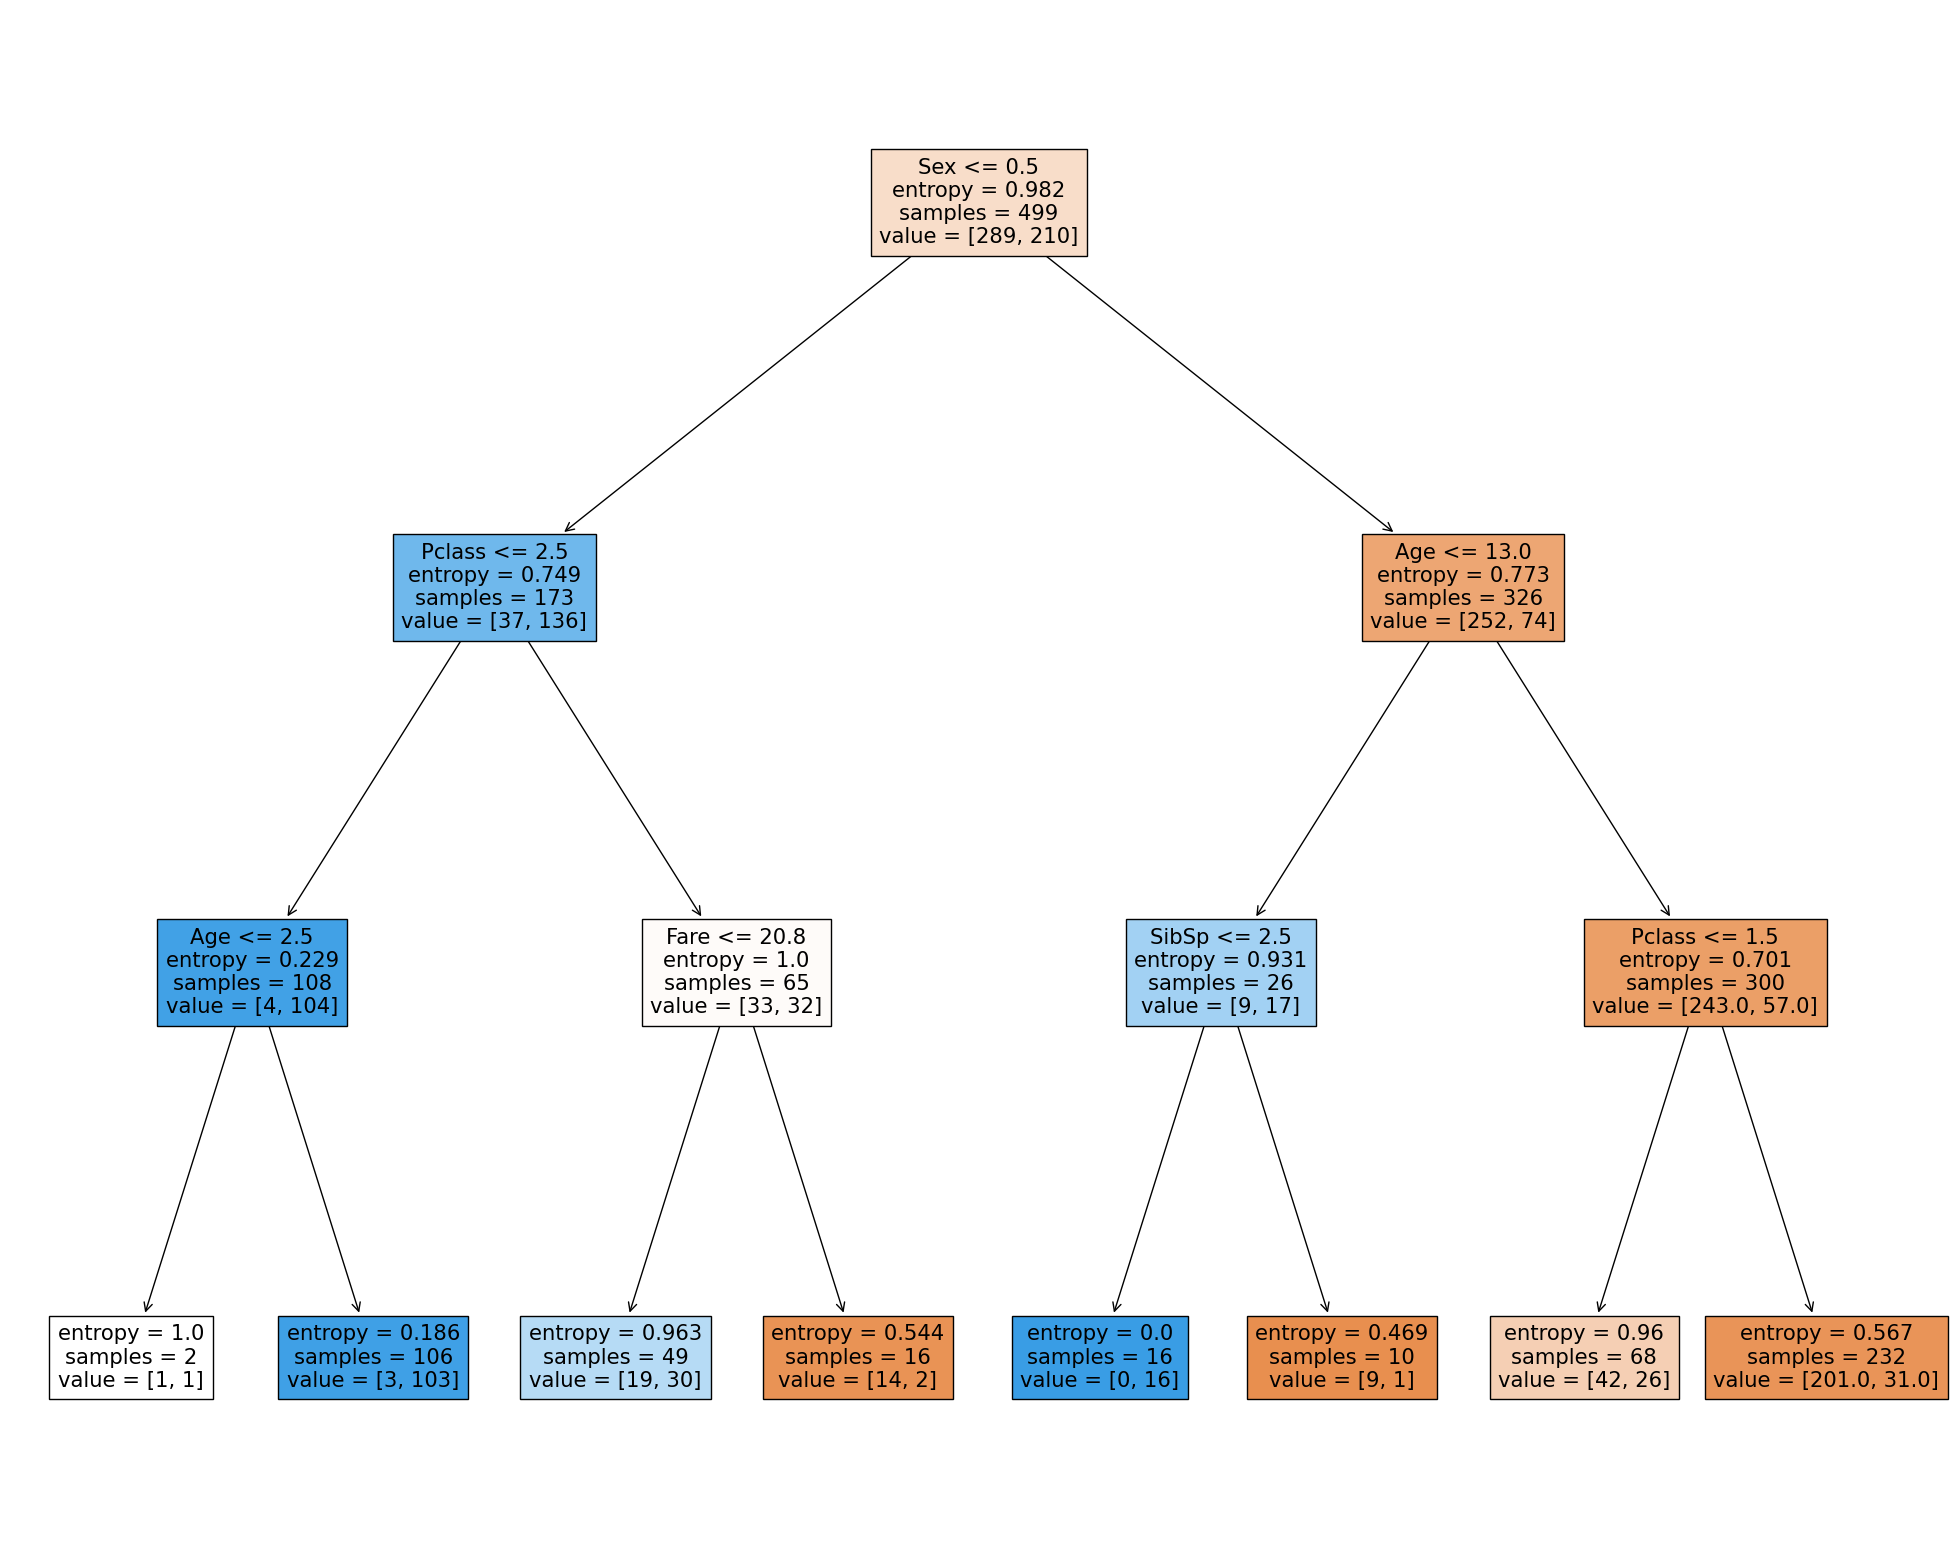

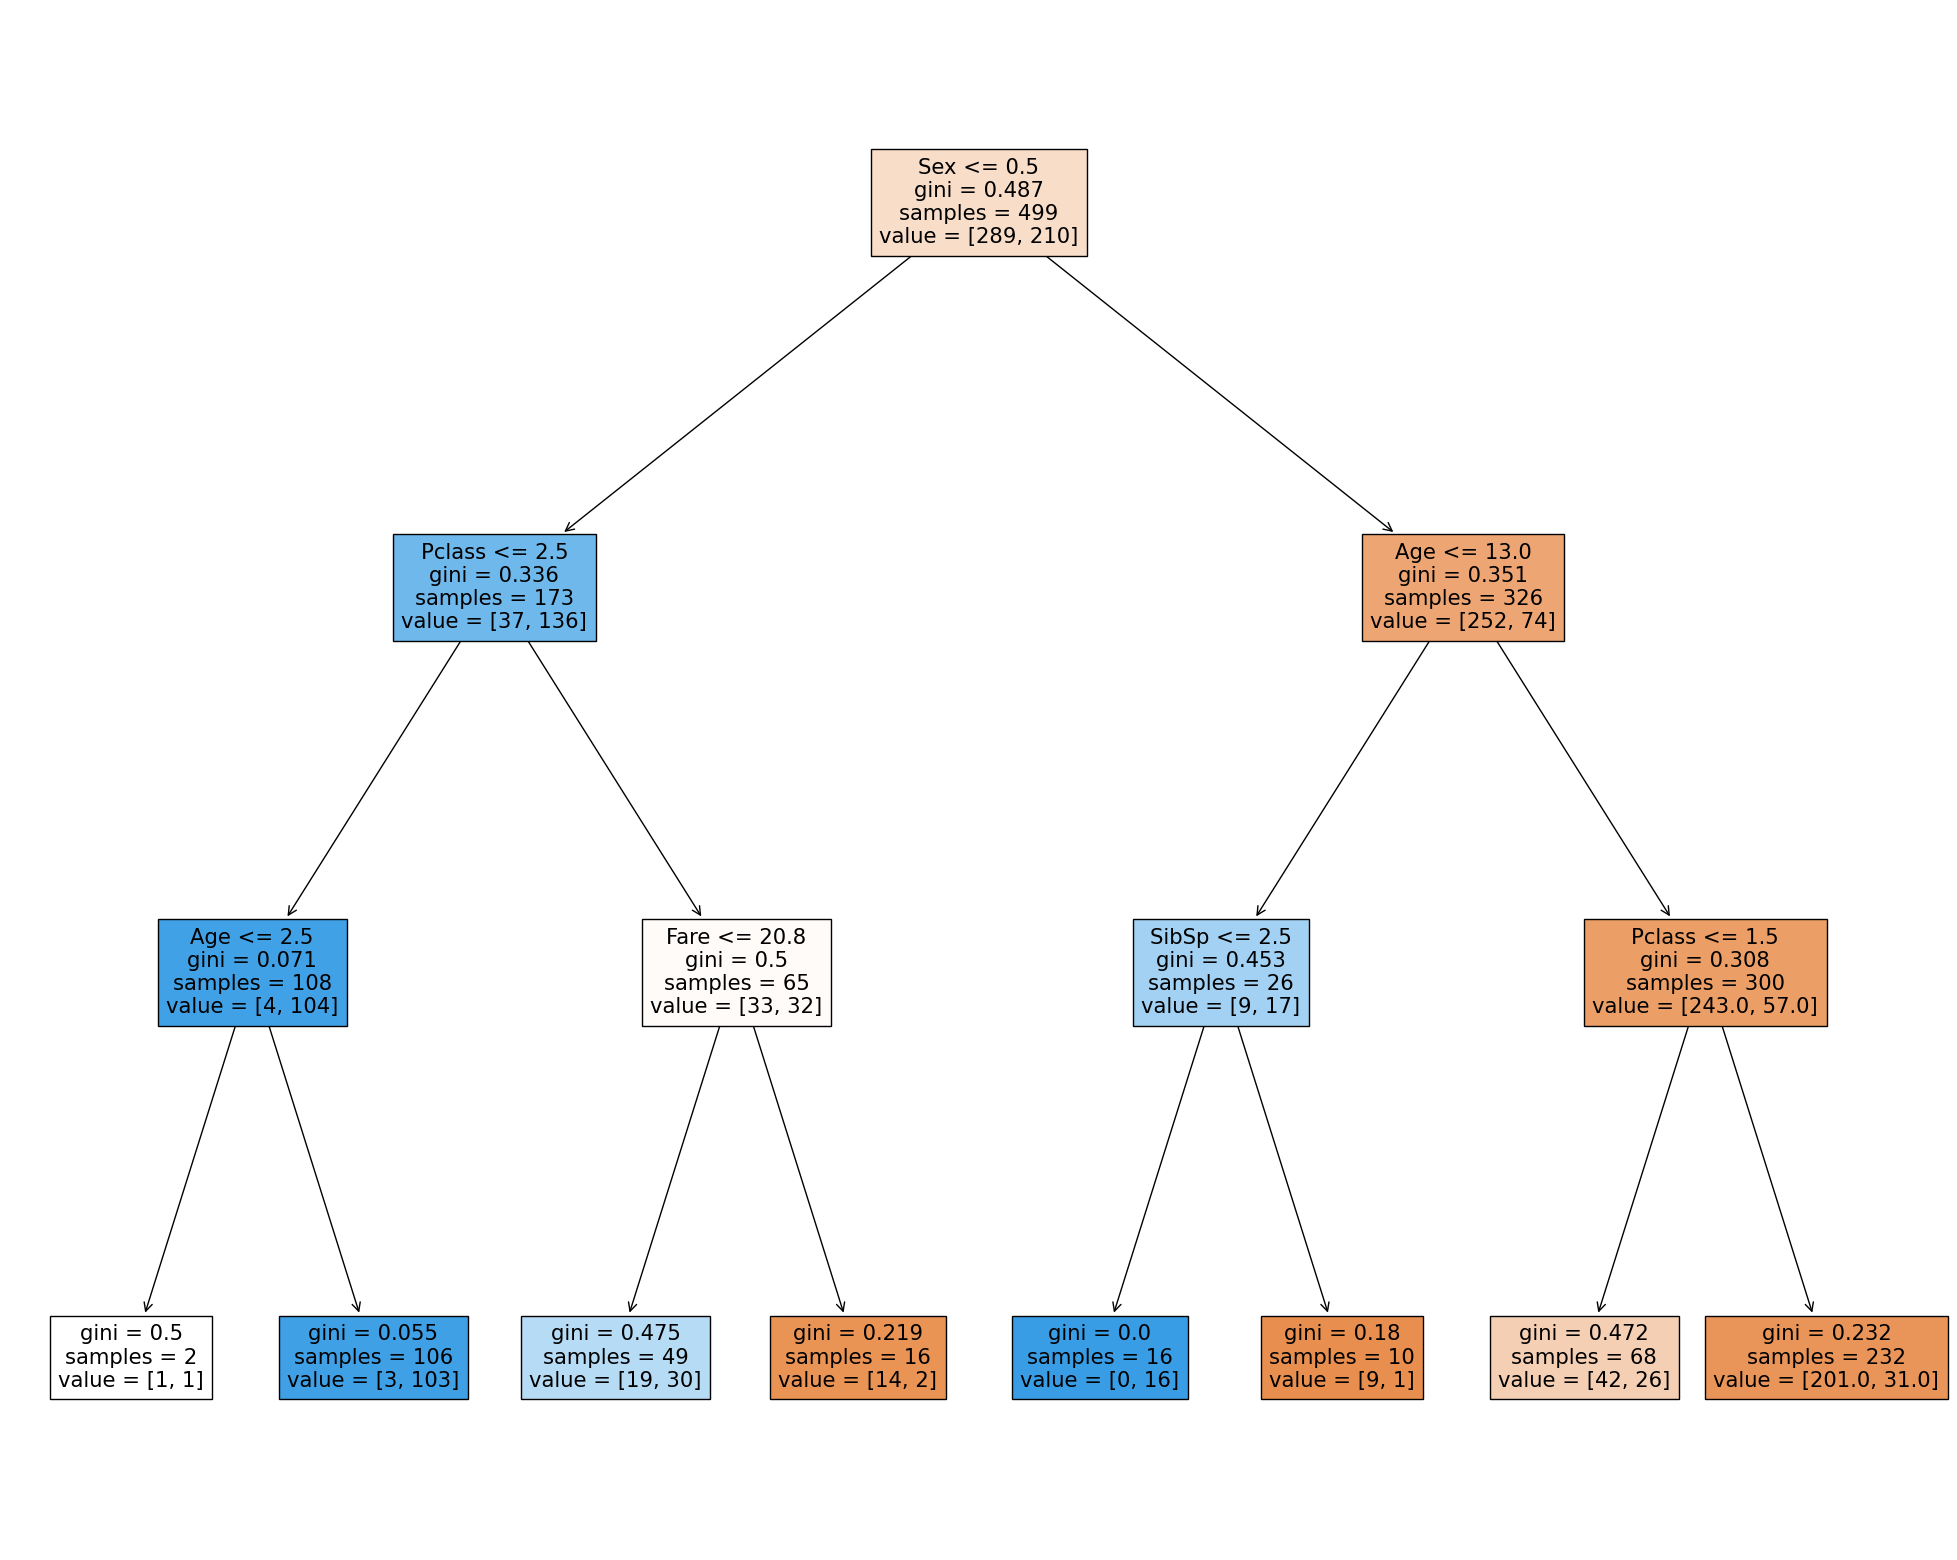

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# Encoder la variable Sex
label_encoder = LabelEncoder()
train['Sex'] = label_encoder.fit_transform(train['Sex'])
test['Sex'] = label_encoder.transform(test['Sex'])

print(f"Description of the train set:{train.describe()}")
print(f"Information about the train set:{train.info()}")
print("============================")
print(f"Description of the test set:{test.describe()}")
print(f"Description of the test set:{test.info()}")

classes = train.drop(['Name', 'Survived', 'Ticket', 'Cabin', 'Embarked'], axis='columns')
target = train['Survived']

classes = classes.dropna(axis=0)
target = target[classes.index]

x_train, x_test, y_train, y_test = train_test_split(classes, target, test_size=0.3)

model1 = DecisionTreeClassifier(criterion='entropy', max_depth=3)
model1.fit(x_train, y_train)
print(f"The first model's score: {model1.score(x_train, y_train)}")

model2 = DecisionTreeClassifier(criterion='gini', max_depth=3)
model2.fit(x_train, y_train)
print(f"The second model's score: {model2.score(x_train, y_train)}")

logistic_model = LogisticRegression()
logistic_model.fit(x_train, y_train)
print(f"The logistic model's score: {logistic_model.score(x_train, y_train)}")

from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model1, feature_names=x_train.columns, filled=True)

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model2, feature_names=x_train.columns, filled=True)

We compared two decision tree models and a logistic regression model on the Titanic dataset for predicting passenger survival. The tuned decision tree models performed best with an accuracy score of 0.834, followed closely by logistic regression at 0.778. Based on these results, the tuned decision tree models emerge as the strongest performers for predicting survival outcomes on the Titanic data, albeit with a relatively small margin over logistic regression. Careful tuning and evaluation of multiple modeling approaches allowed us to identify the optimal predictive models.